# Digital Assignment - 2 

# K Mohan Datta
# 20MID0012
# L43+L44

<b>Write a python code to classify the input digit as ‘9’ or not. Use MNIST data set. Also display
the sample image and print the performance measure of SDC classifier.</b>

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
mnist = fetch_openml('mnist_784',version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,y = mnist['data'],mnist['target']
print(X.shape)

(70000, 784)

In [ ]:
print(y.shape)

(70000,)

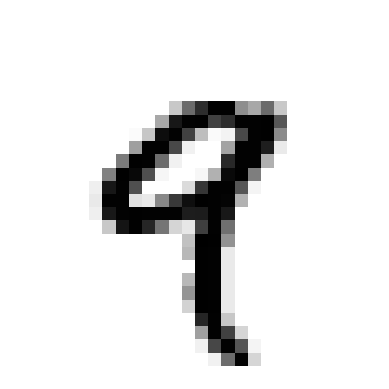

In [112]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.values[4]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [ ]:
print(y[4])

'9'

In [ ]:
y=y.astype(np.uint8)
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [115]:
X_train,X_test,y_train,y_test = X[:60000].values,X[60000:].values,y[:60000],y[60000:]

In [116]:
y_train_9 = (y_train==9).values# True for all 5s, False for all other digits.
y_test_9 = (y_test ==9).values
print(y_train_9[0])

False


In [117]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_9)
some_digit = [9]
p = sgd_clf.predict(X_test)

In [118]:
count=0
i=0
for x in X_test:
    if(sgd_clf.predict(x.reshape(1,-1))==y_test_9[i]):
        count=count+1
    i=i+1
print(count)

9476


In [119]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds  = StratifiedKFold(n_splits=3)
sk_splits = skfolds.split(X_train,y_train_9)

In [120]:
for train_index,test_index in sk_splits:
    clone_clf=clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_9[test_index]
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9456
0.95195
0.9509


In [121]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_9,cv=5,scoring='accuracy')

array([0.94783333, 0.93491667, 0.94208333, 0.94983333, 0.95175   ])

In [122]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_9,cv=3)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9,y_train_pred)

array([[52715,  1336],
       [ 1695,  4254]], dtype=int64)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: ')
print(precision_score(y_train_9,y_train_pred))
print('Recall: ')
print(recall_score(y_train_9,y_train_pred))
print('F1-Score: ')
print(f1_score(y_train_9,y_train_pred))

Precision: 
0.7610017889087657
Recall: 
0.7150781643973777
F1-Score: 


0.737325591472398

<b>Perform the following Regression for synthetic dataset. Split the dataset as 80, 20. Use 20%for testing and print the MSE. Tabulate the results and write its inference.</b>

# Rigid Regression && Lasso Regression

In [124]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [ ]:
# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=10, n_informative=8,n_targets=4)
X=pd.DataFrame(X)
print(X.head())

,0,1,2,3,4,5,6,7,8,9
0,1.186943,2.253652,-0.019976,-1.418118,1.418761,-0.755570,0.551765,-0.720037,-0.067072,0.891299
1,-0.318687,-0.171967,-1.553460,-1.653756,1.417785,-0.951088,1.784531,-1.909871,-0.617282,-0.385315
2,-1.117207,0.401502,-0.810841,-1.168079,0.250983,0.432568,0.102745,0.153688,-0.334524,-1.422257
3,-0.365307,0.932627,-0.753507,-0.860600,1.464120,0.102073,0.679553,-1.442549,-1.366596,0.350946
4,-2.445956,-0.084932,-2.346773,-0.898937,-0.512127,1.034778,1.142281,-1.398650,-0.815293,0.458069


In [126]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Perform rigid regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_mse)

Ridge MSE: 3.010349477809376


In [128]:
# Perform Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE:",lasso_mse)

Lasso MSE: 0.11630668176938161


In [130]:
# Print MSE for each model
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:",lasso_mse)

Ridge MSE: 3.010349477809376
Lasso MSE: 0.11630668176938161


From above we can see that for the given generated synthetic data <b>Lasso Regression Model</b> performs better than <b>Ridge Regression Model</b>